# Check the trihydrogen geometry creation code is working as expected!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import energy
import molecule

In [15]:
trihydrogen = molecule.trihydrogen_cation(1, basis="sto-3g")
# trihydrogen = molecule.trihydrogen_cation(1, basis="6-31G")
# trihydrogen = molecule.trihydrogen_cation(1, basis="cc-pvdz")
print(trihydrogen.n_qubits)

None


In [16]:
fci_energies = energy.fci_energy(trihydrogen)

In [66]:
ground_state = list(zip(*fci_energies))[0]
min_index = np.argmin(ground_state)
min_bond_length = bond_lengths[min_index]
min_bond_length

1.0

## Create trihydrogen cations with choice of basis set

In [24]:
bond_lengths = np.linspace(0.85, 0.95, 11)
trihydrogen_list = [molecule.trihydrogen_cation(bond_length, basis="sto-3g") for bond_length in bond_lengths]
# trihydrogen_list = [molecule.trihydrogen_cation(bond_length, basis="6-31g") for bond_length in bond_lengths]
# trihydrogen_list = [molecule.trihydrogen_cation(bond_length, basis="cc-pvdz") for bond_length in bond_lengths]
geometries = [trihydrogen.geometry for trihydrogen in trihydrogen_list]
points2d = []
for geometry in geometries:
    points2d.append([point[:2] for symbol, point in geometry])

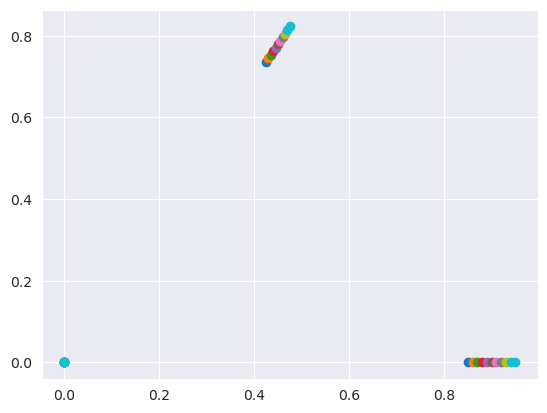

In [25]:
colors = plt.cm.tab10
fig = plt.figure()
for i, triangle in enumerate(points2d):
    color = colors(i)
    for point in triangle:
        plt.scatter(*point, color=color)
plt.show()

In [26]:
mol = trihydrogen_list[0]
energy.fci_energy(mol)

array([-1.32972641, -0.75794657, -0.75794657, -0.59677575, -0.59677575,
       -0.41967023, -0.33700952, -0.14085366, -0.14085366, -0.07538876,
       -0.06658486, -0.06658486,  0.02532413,  0.08662741,  0.08662741,
        0.1320063 ,  0.14670809,  0.37536407,  0.37536407,  0.42990988,
        0.42990988,  0.54302281,  0.54302281,  0.59970265,  0.61148985,
        0.61148985,  0.620642  ,  0.620642  ,  0.64335545,  0.64501564,
        0.64501564,  0.66894147,  0.68664781,  0.68664781,  0.75800792,
        0.77413254,  0.79526052,  0.8152387 ,  0.8152387 ,  0.82468677,
        0.82468677,  0.96932538,  0.96932538,  0.97263439,  1.00488104,
        1.00488104,  1.01373848,  1.03125184,  1.0853869 ,  1.0853869 ,
        1.20987571,  1.21586867,  1.28145859,  1.28145859,  1.28508253,
        1.29906081,  1.29906081,  1.31300836,  1.31300836,  1.31598721,
        1.32944739,  1.32944739,  1.35102524,  1.35102524,  1.36620981,
        1.43845383,  1.46338811,  1.49360864,  1.49607249,  1.51

In [27]:
fci_energies = []
for mol in trihydrogen_list:
    fci_energies.append(energy.fci_energy(mol))
fci_stretch = np.array(list(zip(*fci_energies)))
fci_stretch

array([[-1.32972641, -1.3306228 , -1.33130227, ..., -1.3314624 ,
        -1.33093063, -1.33026317],
       [-0.75794657, -0.76784167, -0.77737478, ..., -0.82774056,
        -0.83511098, -0.84221838],
       [-0.75794657, -0.76784167, -0.77737478, ..., -0.82774056,
        -0.83511098, -0.84221838],
       ...,
       [ 5.62470105,  5.54278301,  5.46498458, ...,  5.07218635,
         5.01711606,  4.96451409],
       [ 5.62470105,  5.54278301,  5.46498458, ...,  5.07218635,
         5.01711606,  4.96451409],
       [ 5.74349111,  5.65932444,  5.57941746, ...,  5.17648043,
         5.12007224,  5.06621565]])

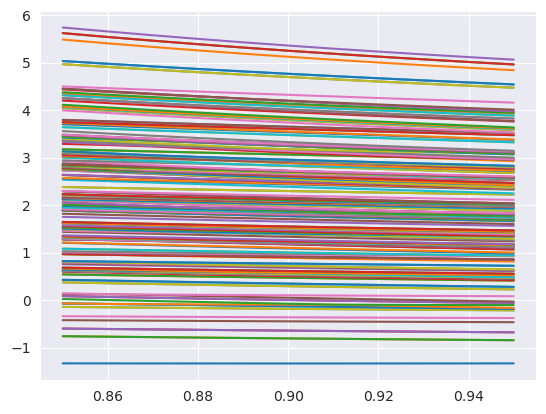

In [28]:
plt.plot(bond_lengths, fci_energies)
plt.show()

In [29]:
ground_state = list(zip(*fci_energies))[0]
min_index = np.argmin(ground_state)
min_bond_length = bond_lengths[min_index]
min_bond_length

0.8999999999999999

# Use FCI to classically find conical intersection
So! 1 Angstrom is the bond length for the minimum

In [73]:
def trihydrogen_cation_x_sweep(x):
    """H3+ molecule for x-axis sweep of third hydrogen."""
    geometry = [
    ('H', (0, 0, 0)),
    ('H', (1, 0, 0)),
    ('H', (x, np.sqrt(3)/2, 0))
    ]
    return molecule.create_molecule(geometry, charge=1, multiplicity=1)

In [74]:
trihydrogen_list = []
x_coords = np.linspace(0, 1, 21)
for x in x_coords:
    trihydrogen = trihydrogen_cation_x_sweep(x)
    trihydrogen_list.append(trihydrogen)

fci_energies = []
for mol in trihydrogen_list:
    # 27.2114 converts Ha to eV
    fci_energies.append(energy.fci_energy(mol) * 27.2114)

In [75]:
# %matplotlib widget
%matplotlib inline
import seaborn as sns
sns.set_theme()

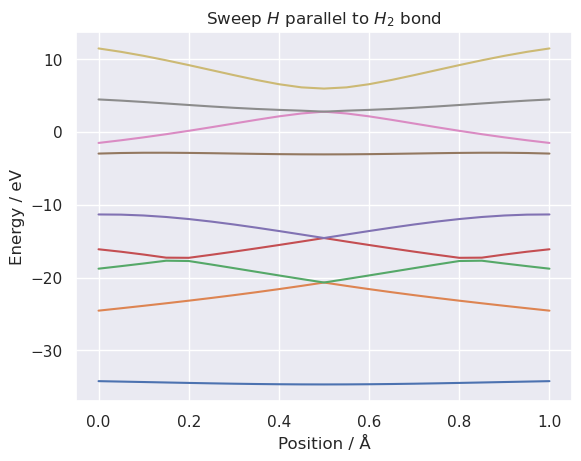

In [76]:
plt.plot(x_coords, fci_energies)
plt.title(r"Sweep $H$ parallel to $H_2$ bond")
plt.xlabel("Position / Å")
plt.ylabel("Energy / eV")
plt.show()

In [77]:
plt.savefig("trihydrogen_cation_x_sweep.svg")
plt.savefig("trihydrogen_cation_x_sweep.png", transparent=True)

<Figure size 640x480 with 0 Axes>

# Repeat for multiplicity 3 to see if there are any triplet states

In [78]:
import numpy as np
from matplotlib import pyplot as plt

import energy
import molecule

In [79]:
def trihydrogen_cation_x_sweep_triplet(x):
    """H3+ molecule for x-axis sweep of third hydrogen."""
    geometry = [
    ('H', (0, 0, 0)),
    ('H', (1, 0, 0)),
    ('H', (x, np.sqrt(3)/2, 0))
    ]
    return molecule.create_molecule(geometry, charge=1, multiplicity=3)

triplet_list = []
x_coords = np.linspace(0, 1, 21)
for x in x_coords:
    triplet = trihydrogen_cation_x_sweep_triplet(x)
    triplet_list.append(triplet)

In [80]:
fci_triplet_energies = []
for mol in triplet_list:
    # 27.2114 converts Ha to eV
    fci_triplet_energies.append(energy.fci_energy(mol) * 27.2114)

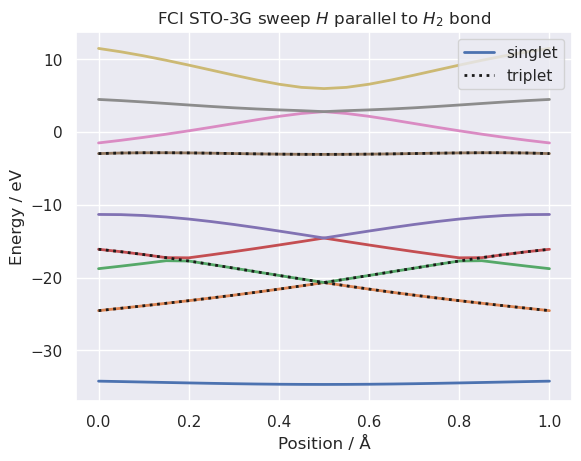

In [81]:
%matplotlib inline

# Plotting values to np arrays for slicing
fci_energies = np.array(fci_energies)
fci_triplet_energies = np.array(fci_triplet_energies)

plt.plot(x_coords, fci_energies[:,0], linewidth=2, label="singlet") # For single legend label
plt.plot(x_coords, fci_energies[:,1:], linewidth=2)
plt.plot(x_coords, fci_triplet_energies[:,0], 'k:', linewidth=2, label="triplet")
plt.plot(x_coords, fci_triplet_energies[:,1:], 'k:', linewidth=2)

plt.title(r"FCI STO-3G sweep $H$ parallel to $H_2$ bond")
plt.xlabel("Position / Å")
plt.ylabel("Energy / eV")
plt.legend()

plt.savefig("trihydrogen/trihydrogen_cation_x_sweep.svg")
plt.savefig("trihydrogen/trihydrogen_cation_x_sweep.png")

plt.show()

In [82]:
mol = trihydrogen_list[0]
geometry = [coords for atom, coords in mol.geometry]
geometry

[(0, 0, 0), (1, 0, 0), (0.0, 0.8660254037844386, 0)]

In [83]:
points2d = [[coords[:2] for atom, coords in mol.geometry] for mol in trihydrogen_list]

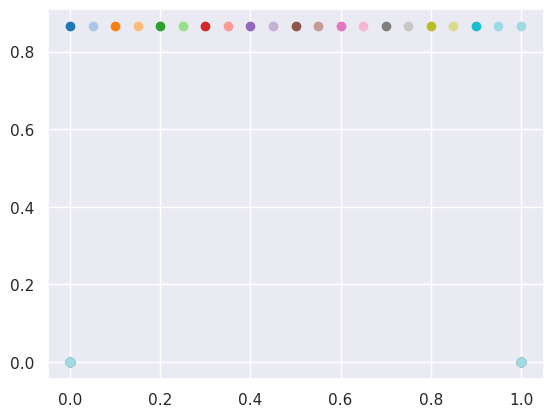

In [84]:
colors = plt.cm.tab20
fig = plt.figure()
for i, triangle in enumerate(points2d):
    color = colors(i)
    for point in triangle:
        plt.scatter(*point, color=color)
plt.show()